# Mixed Strategies in Games
So far we have dealt with choices over strategies as a selection over actions where a player selects the option with *100% certainty*
* Example: Matching Pennies Game. Players pick H or T secretly and reveal their choice simultaneously.

### Is it realistic for strategies to always be *pure*?
The simple answer is **not always**

Examples:
* In matching pennies, you might prefer to flip the coin

How might we incorporate the idea of a "flip of the coin" into our games?

![matchingpennies](matchingpennies.png)

## Definition: **Mixed Strategies**
 Given a set of players $I=\{1,\ldots,n\}$ with actions (aka pure strategies) $A_i$ available, a *mixed strategy* is a probability distributions $\sigma$ over the set of pure strategies.

 Example: Flipping the coin can be thought of as a probability distribution $\sigma=(s_H,s_T)=(0.5,0.5)$ where $p(H)=s_H$ and $p(T)=s_T$

## Expected Value of a Mixed Strategy
We can envision all strategies, including pure strategies, as mixed strategies.
* If you select Heads as a pure strategy, this is equivalent to having a mixed strategy $\sigma=(1,0)$

When we add in this element of randomization over outcomes, we can no longer look at the payoff as certain. Instead, we will only be able to consider the **expected value**, or the payoff that you could expect to get if you were to get on average if you played this game over and over. Imagine that we have a random variable X with outcomes (-1,1) and a probability distribution of (0.5,0.5). Then the expected value of X is
$$E(X)=0.5(-1)+0.5(1)=0$$

Now, we need to add in the complication of having an opponent. Imagine that we have two players with two possible actions each (i.e., matching pennies).
$$ A_1=(H,T)$$
$$ A_2 = (H,T)$$

Let $\sigma_1=(s_{11},s_{12})$ be the mixed strategy for player 1, and $\sigma_2=(s_{21},s_{22})$ for player 2. Let's consider the expected value of pure strategies:

$$E_1(H,\sigma_2)=(1)(s_{21})+(-1)(s_{22})$$
$$E_1(T,\sigma_2)=(-1)(s_{21})+(1)(s_{22})$$

If $\sigma_2=(0.5,0.5)$ the $E_1(H)=E_2(T)=0$


### Calculation:

Notation:

    sik = prob player i picks outcome k
    oiab = outcome to player i if player 1 picks a and player 2 picks b
    Expi_a = expected value to player i of selecting pure strategy a

In [12]:
s11 = 0.5
s12 = 0.5
s21 = 0.5
s22 = 0.5
o1HH = 1 
o2HH = -1
o1HT = -1
o2HT = 1
o1TH = -1
o2TH = 1
o1TT = 1
o2TT = -1

In [13]:
Exp1_H = o1HH*s21 + o1HT*s22 #expected value for player 1 of playing stategy 1
Exp1_H 

0.0

In [14]:
Exp1_T = o1TH*s21 + o1TT*sigma22 #expected value for player 1 of playing stategy 2
Exp1_T 

0.0

In [15]:
Exp2_H = o2HH*s11 + o2TH*s12 #expected value for player 2 of playing stategy 1
Exp2_H 

0.0

In [16]:
Exp2_T = o2HT*s11 + o2TT*s12 #expected value for player 2 of playing stategy 2
Exp2_T 

0.0

**All the expected values are zero! What if we changed $\sigma$??**

## The overall expected payoffs is 
$$ E_1(\sigma_1,\sigma_2) = s_{11}E_1(H)+s_{12}E_1(T)$$
$$ E_2(\sigma_1,\sigma_2) = s_{21}E_2(H)+s_{22}E_2(T)$$

## Best responses

Assume:
$$\sigma_1 = (p,1-p)$$
$$\sigma_2 = (q,1-q)$$

Then the pure strategy expected values are:
$$E_1(H,\sigma_2) = 1q+(-1)(1-q) = 2q-1$$
$$E_1(T,\sigma_2) = (-1)q+1(1-q) = 1-2q$$
$$E_2(\sigma_1,H) = (-1)p+1(1-p) = 1-2p$$
$$E_2(\sigma_1,T) = 1p+(-1)(1-p) = 2p-1$$

#### Best response for player 1:
1. Player 1 picks H: $p=(1,0)$ if 
$$E_1(H,\sigma_2)>E_1(T,\sigma_2)$$
$$ 2q-1>1-2q$$
$$q>1/2$$
2. Player 1 picks T: $p=(0,1)$ if 
$$E_1(H,\sigma_2)<E_1(T,\sigma_2)$$
$$ 2q-1<1-2q$$
$$q<1/2$$
3. Player 1 picks H: $\{p:0\leq p \leq 1\}$ if 
$$E_1(H,\sigma_2)=E_1(T,\sigma_2)$$
$$ 2q-1=1-2q$$
$$q=1/2$$

#### Best response for player 2:
1. Player 1 picks H: $q=(1,0)$ if 
$$E_2(\sigma_1,H)>E_2(\sigma_1,T)$$
$$ 1-2p>2p-1$$
$$p<1/2$$
2. Player 1 picks T: $q=(0,1)$ if 
$$E_2(\sigma_1,H)<E_2(\sigma_1,T)$$
$$ 1-2p<2p-1$$
$$p>1/2$$
3. Player 1 picks H: $\{q:0\leq q \leq 1\}$ if 
$$E_2(\sigma_1,H)=E_2(\sigma_1,T)$$
$$ 1-2p=2p-1$$
$$p=1/2$$

(-0.04995, 1.04895, -0.031236636681076475, 0.6559693703026059)

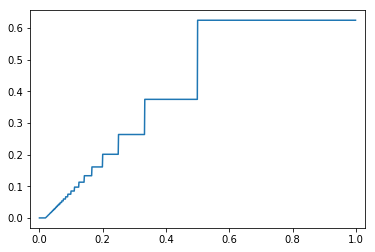

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
B = [0,.5,1 ]

y = np.zeros(N)
count = 1
for b in B:
    x = np.zeros(N)
    x[ np.arange(b[0]*1.0*N/b[1], N).astype(int)]=count**-2
    y += x
    count += 1

plt.plot(np.arange(0,1,1.0/N),y)
plt.axis("Equal")